In [12]:
import timeatlas as ta
import matplotlib.pyplot as plt
from pandas import Series, DatetimeIndex

## Grammar

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

---
# Univariate Prediction

To create a univariate prediction, let's populate a time series with a small set of values.

In [7]:
## Data Loading
index = DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'])
my_series = Series([0.4, 1.0, 0.7, 0.6], index=index)
ts = ta.TimeSeries(my_series)
ts

            values
2019-01-01     0.4
2019-01-02     1.0
2019-01-03     0.7
2019-01-04     0.6

In [8]:
## Model Creation
m = ta.models.Prophet()

In [9]:
## Fit the univariate time series
m.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


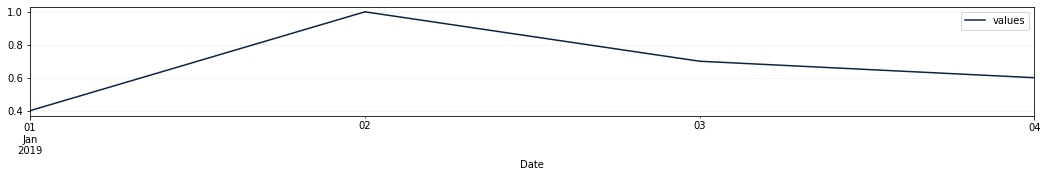

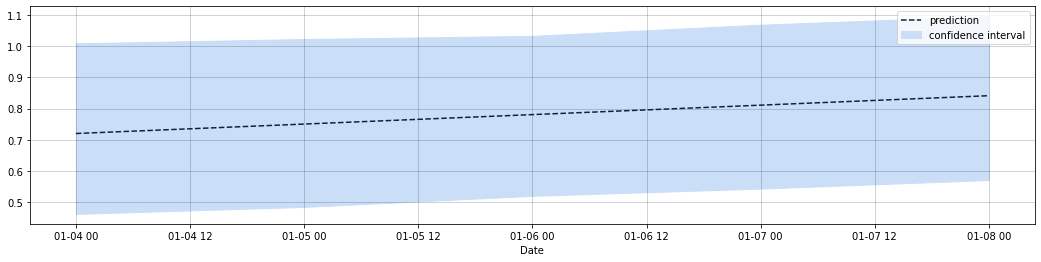

In [10]:
# Predict 4 days after the data's last time stamp
Y_hat = m.predict('4 days')
m.X_train.plot()
Y_hat.plot()

## Multivariate Prediction

In [15]:
ts1 = ta.TimeSeries.create("01-01-2020", "01-03-2020", "H").fill(0)
ts2 = ta.TimeSeries.create("01-01-2020", "01-03-2020", "H").fill(0)
ts3 = ta.TimeSeries.create("01-01-2020", "01-03-2020", "H").fill(0)
ts4 = ta.TimeSeries.create("01-01-2020", "01-03-2020", "H").fill(0)
tsd = ta.TimeSeriesDataset([ts1, ts2, ts3, ts4])

In [16]:
tsd

4

In [17]:
## Model Creation
multivariate_model = ta.models.Prophet()

In [18]:
multivariate_model.fit(tsd)

AttributeError: 'TimeSeriesDataset' object has no attribute 'to_df'

In [22]:
tsd

4

In [28]:
def get_columns(tsd)

[ts.label for ts in tsd]

[None, None, None, None]

In [33]:
list(range(3))

[0, 1, 2]

In [36]:
import pandas as pd
df = pd.concat([ts.series for ts in tsd], axis=1)

In [37]:
df

,values,values,values,values
2020-01-01 00:00:00,0,0,0,0
2020-01-01 01:00:00,0,0,0,0
2020-01-01 02:00:00,0,0,0,0
2020-01-01 03:00:00,0,0,0,0
2020-01-01 04:00:00,0,0,0,0
2020-01-01 05:00:00,0,0,0,0
2020-01-01 06:00:00,0,0,0,0
2020-01-01 07:00:00,0,0,0,0
2020-01-01 08:00:00,0,0,0,0
2020-01-01 09:00:00,0,0,0,0


In [38]:
df.columns = list(range(len(tsd)))

In [39]:
df

,0,1,2,3
2020-01-01 00:00:00,0,0,0,0
2020-01-01 01:00:00,0,0,0,0
2020-01-01 02:00:00,0,0,0,0
2020-01-01 03:00:00,0,0,0,0
2020-01-01 04:00:00,0,0,0,0
2020-01-01 05:00:00,0,0,0,0
2020-01-01 06:00:00,0,0,0,0
2020-01-01 07:00:00,0,0,0,0
2020-01-01 08:00:00,0,0,0,0
2020-01-01 09:00:00,0,0,0,0
